<a href="https://colab.research.google.com/github/Zamariolo/MogiOpenData/blob/master/covid19MogiGuacu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de COVID-19 em Mogi Guaçu

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Zamariolo/MogiOpenData/master/Dados/dadosCasosCOVIDMogiGuacu.csv')

# Quando foi a última atualização dos dados aqui atualizados?

In [18]:
print("Dados atualizados em: %s" %dataset.iloc[-1:]['data'])

Dados atualizados em: 44    13/05/2020
Name: data, dtype: object


# Quem coleta e como são coletados os dados de isolamento em Mogi Guaçu?

Os dados são obtidos através boletins oficiais da prefeitura de Mogi Guaçu nas redes sociais, visto que possuem atualizações diárias mais precisas do que as fornecidas online pelo Ministério da Saúde. Ressalta-se que nos dados expostos não são considerados casos suspeitos.



# Como está o histórico de casos?

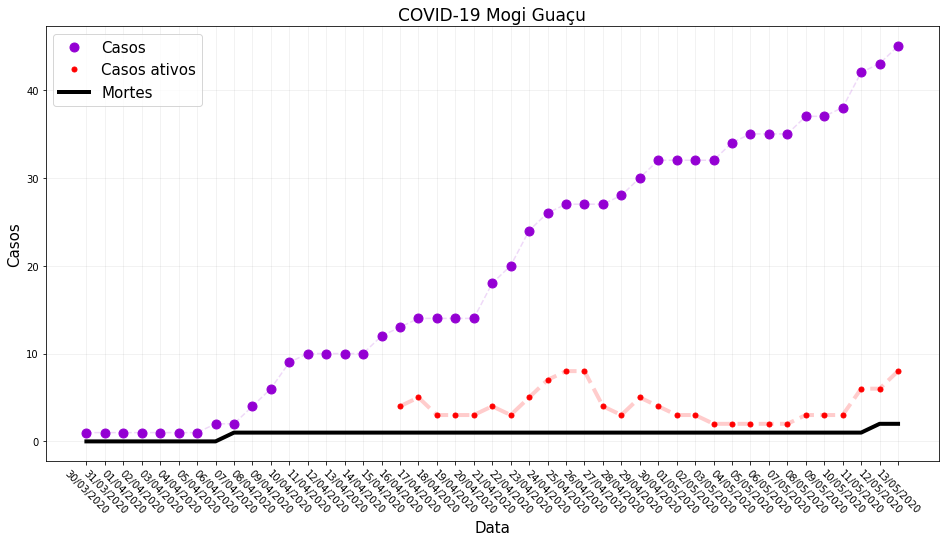

In [19]:
plt.figure(figsize=(16,8))

plt.plot(dataset['data'], dataset['casos'], '.', markersize=18, color='darkviolet', label='Casos')
plt.plot(dataset['data'], dataset['Ativos'], '.', color='red', label="Casos ativos", markersize=10)

plt.plot(dataset['data'], dataset['casos'], '--', alpha=0.15, color='darkviolet')
plt.plot(dataset['data'], dataset['Ativos'], '--', color='red', linewidth=4, alpha=0.2)
plt.plot(dataset['data'], dataset['mortes'],'k', linewidth=4, label='Mortes')
plt.xlabel("Data", fontsize=15)
plt.ylabel("Casos", fontsize=15)
plt.title("COVID-19 Mogi Guaçu", fontsize=17)
plt.grid(alpha=0.1, color='dimgray')
plt.xticks(dataset['data'], rotation=315)
plt.legend(fancybox=True, prop={'size': 15})

plt.show()

# Considerando desde o primeiro contágio quantos casos novos ocorreram por dia?

In [20]:
casosTotais = dataset['casos'].max()
diasDesde1Contagio = dataset['dia desde 1 contagio'].max()
print("Ocorreram em média %.1f novos casos por dia" %(casosTotais/diasDesde1Contagio))

Ocorreram em média 1.0 novos casos por dia


# Considerando os últimos 7 dias, em média, quantos novos casos ocorreram por dia?

In [21]:
dados = dataset[-7:]
novosCasos = dados['casos'].max() - dados['casos'].min()
print("Aconteceram %.0f novos casos nos ultimos 7 dias" %novosCasos)
print("Nos ultimos 7 dias ocorreram, em média, %.1f novos casos por dia" %(novosCasos/7))

Aconteceram 10 novos casos nos ultimos 7 dias
Nos ultimos 7 dias ocorreram, em média, 1.4 novos casos por dia


# O número de novos casos está aumentando com o tempo?

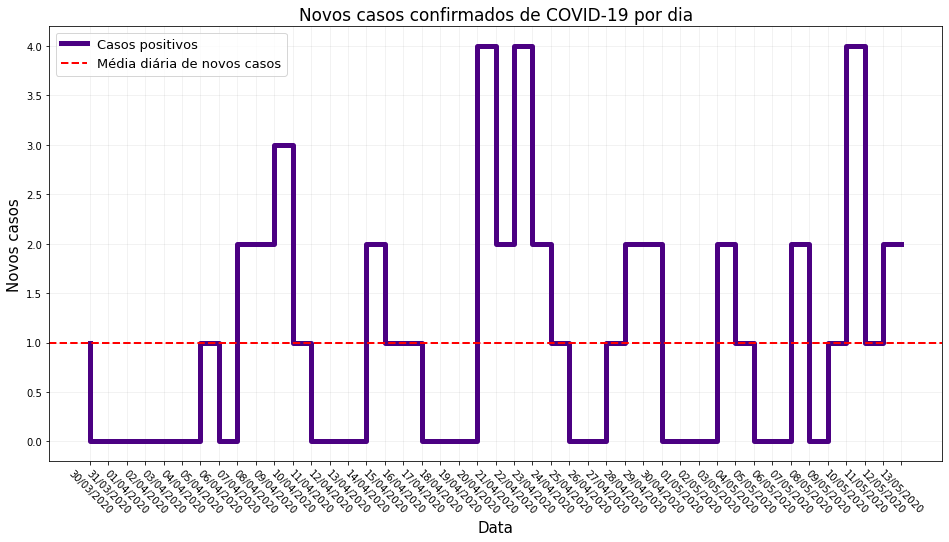

In [22]:
plt.figure(figsize=(16,8))
plt.step(dataset['data'], dataset['novosCasos'], label="Casos positivos", color='indigo', linewidth=5)
plt.axhline(dataset['novosCasos'].mean(), linestyle='--', label="Média diária de novos casos", color='red', linewidth=2)
plt.xlabel("Data", fontsize=15)
plt.ylabel("Novos casos", fontsize=15)
plt.grid(alpha=0.1, color='dimgray')
plt.legend(fontsize=13)
plt.title("Novos casos confirmados de COVID-19 por dia", fontsize=17)
plt.xticks(dataset['data'], rotation=315)
plt.show()

In [23]:
dataset['novosCasos'].values

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 3, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       4, 2, 4, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 4, 1,
       2])

# Histórico de testes realizados

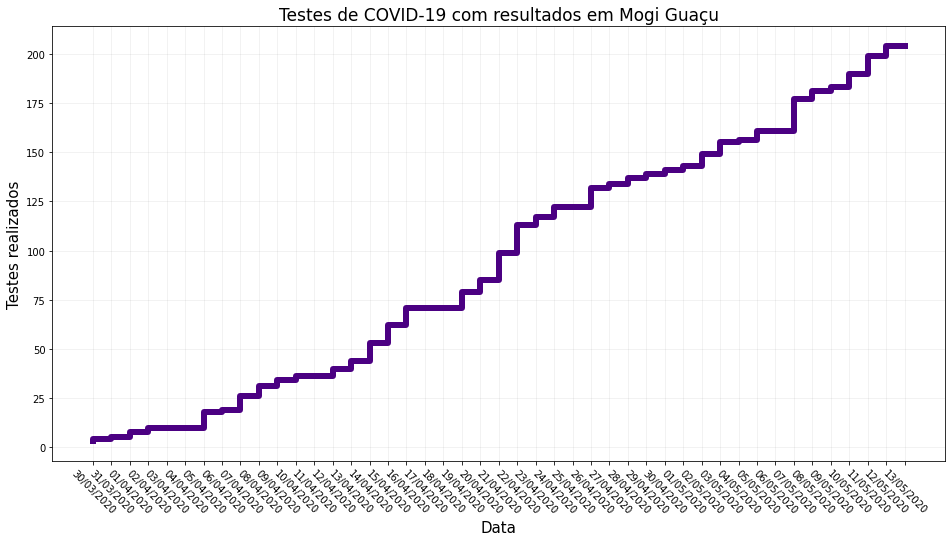

In [24]:
plt.figure(figsize=(16,8))

plt.step(dataset['data'], dataset['Testes realizados'], color='indigo', linewidth=6)
plt.xticks(dataset['data'], rotation=315)
plt.grid(alpha=0.1, color='dimgray')
plt.ylabel("Testes realizados", fontsize=15)
plt.xlabel("Data", fontsize=15)
plt.title("Testes de COVID-19 com resultados em Mogi Guaçu", fontsize=17)
plt.show()

# Quantos testes foram realizados, em média, por dia?

In [25]:
testesRealizados = dataset['Testes realizados'].max()
diasTotais = dataset['dia desde 1 contagio'].max()
print("Em média, realizaram-se %.2f testes por dia" %(testesRealizados/diasTotais))

Em média, realizaram-se 4.53 testes por dia


# Últimamente, estamos realizandos mais testes por dia?

Testes realizados nos últimos 7 dias: 43
Só nos últimos 7 dias realizaram-se, em média, 6.1 testes por dia


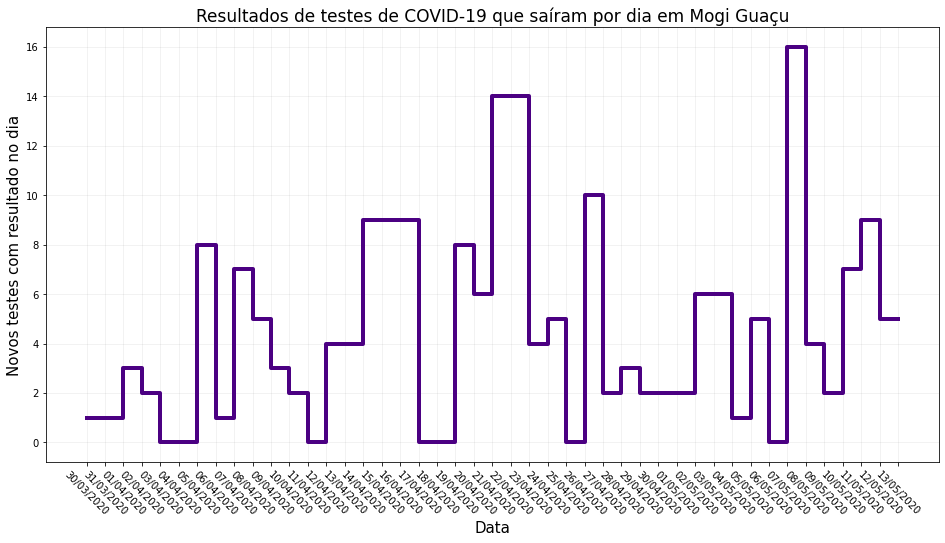

Não é possível observar um padrão de crescimento nos testes realizados por dia


In [26]:
testesRealizados = dataset['Testes realizados'].iloc[-1] - dataset['Testes realizados'].iloc[-7]
testesDia = [1]

for i in range(1, len(dataset['Testes realizados'])):
  testesDia.append(dataset['Testes realizados'].iloc[i] - dataset['Testes realizados'].iloc[i-1])

print("Testes realizados nos últimos 7 dias: %.0f" %testesRealizados)
print("Só nos últimos 7 dias realizaram-se, em média, %.1f testes por dia" %(testesRealizados/7))

plt.figure(figsize=(16,8))
plt.step(dataset['data'], testesDia, color='indigo', linewidth=4)
plt.xticks(dataset['data'], rotation=315)
plt.grid(alpha=0.1, color='dimgray')
plt.ylabel("Novos testes com resultado no dia", fontsize=15)
plt.xlabel("Data", fontsize=15)
plt.title("Resultados de testes de COVID-19 que saíram por dia em Mogi Guaçu", fontsize=17)
plt.show()

print("Não é possível observar um padrão de crescimento nos testes realizados por dia")

# Quais são as informações contidas nestes dados?

In [27]:
dataset.head(2)

,dia desde 1 contagio,data,casos,mortes,Ativos,confirmado por 100k hab,taxa morte contaminados,Curados,Casos negativos,Testes realizados,novosCasos,novosTestes
0,1,30/03/2020,1,0,NaN,"0,6583798588",0,0.0,2,3,1,3
1,2,31/03/2020,1,0,NaN,"0,6583798588",0,NaN,3,4,0,1




*   **dia desde 1 contagio**: Contagem dos dias desde o primeiro contagio confirmado na cidade;
*   **data**: Data da informação;
*   **casos**: Casos acumulados de COVID-19 confirmados (inclui os casos ativos, mortes e pessoas curadas);
*   **mortes**: Número de mortes que testaram positivo para COVID-19;
*   **Ativos**: Número de pessoas que testaram positivo pela COVID-19, estão ou não internadas (casos totais - mortes - curados);
*   **confirmado por 100k hab**: Número de casos acumulados (coluna casos) para cada 100 mil habitantes;
*   **taxa morte contaminados**: Taxa de casos que terminaram em morte dado o numéro total de casos;
*   **Curados**: número de pessoas que testaram positivo para COVID-19 e se recuperaram;
*   **Casos negativos**: Quantidade de pessoas que testaram negativo para COVID-19;
*   **Testes realizados**: Quantidade total de testes realizados (testes positivos + testes negativos).

